## About Dataset
The dataset comprises demographic and health-related attributes aimed at predicting the risk of hypertension. Each entry includes information on gender, age, smoking habits (current smoker and cigarettes per day), medication for high blood pressure (BPMeds), presence of diabetes, total cholesterol levels, systolic and diastolic blood pressure, body mass index (BMI), heart rate, glucose levels, and the corresponding hypertension risk label (0 for low risk, 1 for high risk). With a total of 13 features, this dataset provides a comprehensive overview of factors contributing to hypertension, facilitating the development of predictive models for risk assessment and prevention strategies.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\data sciences\origin\origin-hackton\Hypertension-risk-model-main.csv")
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [4]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [6]:
#split data to x and y
x = df.drop("Risk",axis=1)
y = df["Risk"]


In [7]:
x

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0


In [8]:
x.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [9]:
#replace missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
 
num_imputer = SimpleImputer(strategy="median")

#Define the columns
num_features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
#Create an imputer (simething that fills the missing data)
imputer=ColumnTransformer(transformers=[("num_imputer", num_imputer, num_features)])

#Transform the data
filled_x = imputer.fit_transform(x)

In [10]:
filled_x

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ],
       [  1.  ,  40.  ,   0.  , ...,  25.6 ,  67.  ,  72.  ],
       [  0.  ,  39.  ,   1.  , ...,  20.91,  85.  ,  80.  ]])

In [11]:
filled_x_df = pd.DataFrame(filled_x, columns=num_features)
filled_x_df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,20.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,1.0,30.0,0.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,1.0,23.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,1.0,20.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0
4237,0.0,52.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1.0,40.0,0.0,0.0,0.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0


In [12]:
filled_x_df.isna().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
dtype: int64

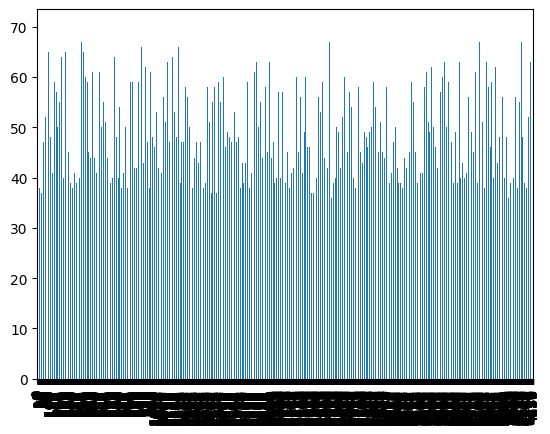

<Figure size 1000x800 with 0 Axes>

In [13]:
#plotting age distribution
filled_x_df["age"].plot.bar()
plt.figure(figsize=(10,8))
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Lasso

In [15]:
#split the data into training,validating and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = filled_x_df
# First split: 70% training, 30% temp (which will be split further)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Second split: 50% of the temp data (15% of the original) for validation, and 50% for test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42) 

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#define a dictionary for models
models = {"Logistic Regression":LogisticRegression(),
          "bc":BaggingClassifier(),
          "hgbc":HistGradientBoostingClassifier(),
          "gn":GaussianNB(),
         "KNN":KNeighborsClassifier(),
          "Lasso":Lasso(),
         "Random Forest": RandomForestClassifier()}
#create a def function for fitiing and evaluating the model

def fit_and_evaluate(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given machine learning models
    models = a dict of different machine learning models
    x_test = test data (no label)
    x_train = train data (no label)
    y_test = test data(label)
    y_train(label)
    """
    
    #create a for loop function for fitting and evaluation
    
    models_score = {}
    
    for name, model in models.items():
        #fit the model
        model.fit(x_train,y_train)
        # evaluate the model by appending it to the empty dictionary
        models_score[name] = model.score(x_test,y_test)

    return models_score


In [16]:
models_score = fit_and_evaluate(models,
                                x_train=x_train,
                                x_test=x_test,
                                y_train=y_train,
                                y_test=y_test)
models_score

c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8238993710691824,
 'bc': 0.8836477987421384,
 'hgbc': 0.9056603773584906,
 'gn': 0.8191823899371069,
 'KNN': 0.8757861635220126,
 'Lasso': 0.4773817912006073,
 'Random Forest': 0.89937106918239}

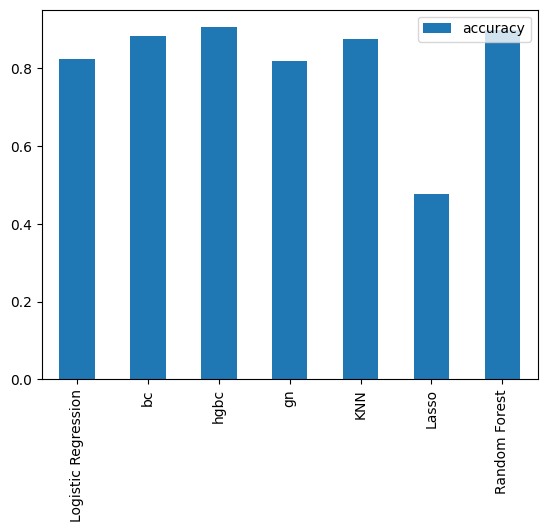

In [17]:
acc_comp=pd.DataFrame(models_score,index=["accuracy"])
acc_comp.T.plot.bar()
plt.show()

In [18]:
#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
log_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C':(1, 10),  # Sample values from a uniform distribution
    'solver': ['newton-cg', 'lbfgs'],
    'max_iter': [100, 200,]
}

rf_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [None, 10, 20],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1,5,3],             # Minimum samples required at each leaf
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for best split
}

hgbc_grid = {
    'learning_rate': np.logspace(-3, 0, 10),  # Small to larger learning rates
    'max_iter': [100, 200,300],  # Number of boosting iterations
    'max_depth': [None, 3, 5, 7],  # Maximum depth of trees
    'min_samples_leaf': [10, 20,50],  # Minimum samples in leaf nodes
    'l2_regularization': np.logspace(-3, 0, 10)  # L2 regularization term
}

#logisticRegression
log = RandomizedSearchCV(LogisticRegression(),
                                       param_distributions=log_grid,
                                       n_iter=20,
                                       cv=10,
                                       verbose=2)
log.fit(x_train,y_train)

#RandomForest

random_forest = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=rf_grid, 
    n_iter=20,  # Number of parameter settings to try
    cv=10,  # 10-fold cross-validation
    verbose=2)

random_forest.fit(x_train,y_train)

#HistGradientBoost
hgbc = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(),
    param_distributions=hgbc_grid,
    n_iter=20,  # Number of iterations to perform
    cv=10,  # 5-fold cross-validation
    verbose=2,  # Output the process
    random_state=42,
    n_jobs=-1  # Use all available processors
)
hgbc.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet

c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; to

c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total t

c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\birge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=10, estimator=HistGradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'max_depth': [None, 3, 5, 7],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [10, 20, 50]},
                   random_state=42, verbose=2)

In [19]:
hgbc.score(x_test,y_test)

0.9009433962264151

In [20]:
log.score(x_test,y_test)

0.8930817610062893

In [21]:
random_forest.score(x_test,y_test)

0.8962264150943396

In [22]:
#Evaluation
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    
    # Use average='weighted' for precision, recall, and f1 score to handle multiclass
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')
    
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [23]:
#hgbc
hgbc = HistGradientBoostingClassifier()
hgbc.fit(x_train,y_train)
hgbc_y_preds = hgbc.predict(x_test)
hgbc_metrics = evaluate_preds(y_test,hgbc_y_preds)
hgbc_metrics

Accuracy: 90.57%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


{'accuracy': 0.91, 'precision': 0.91, 'recall': 0.91, 'f1': 0.91}

In [24]:
from joblib import dump,load
dump(hgbc,filename="hgbc_model_for_hypertension.joblib")

['hgbc_model_for_hypertension.joblib']

In [25]:
load_hgbc_model=load(filename="hgbc_model_for_hypertension.joblib")
load_hgbc_y_preds = load_hgbc_model.predict(x_test)
evaluate_preds(y_test,load_hgbc_y_preds)

Accuracy: 90.57%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


{'accuracy': 0.91, 'precision': 0.91, 'recall': 0.91, 'f1': 0.91}